In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Read the data from a CSV file
# Original source of data: https://insights.stackoverflow.com/survey
df = pd.read_csv('data/survey_results_public.csv')
df_schema= pd.read_csv('data/survey_results_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [7]:
#Find the Column with the question regarding the importance of different factors regarding a job decision
df_schema[df_schema["QuestionText"].str.contains("important")].values

array([['JobFactors',
        'Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?'],
       ['NEWDevOpsImpt',
        'How important is the practice of DevOps to scaling software development?'],
       ['NEWEdImpt',
        'How important is a formal education, such as a university degree in computer science, to your career?']],
      dtype=object)

In [8]:
#What were the different factors and what is the distribution?
df["JobFactors"].value_counts()

Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options                                2777
Languages, frameworks, and other technologies I’d be working with;Office environment or company culture;Opportunities for professional development    2570
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Office environment or company culture              2508
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Opportunities for professional development         1666
Flex time or a flexible schedule;Office environment or company culture;Opportunities for professional development                                     1650
                                                                                                                                                      ... 
Diversity of the company or organization;Remote work options          

In [ ]:
#Multiple answer choices are allowed for this question. Therefore, the data must be modified.

In [2]:
vc=df["JobFactors"].value_counts().reset_index()
vc

,index,JobFactors
0,"Flex time or a flexible schedule;Languages, fr...",2777
1,"Languages, frameworks, and other technologies ...",2570
2,"Flex time or a flexible schedule;Languages, fr...",2508
3,"Flex time or a flexible schedule;Languages, fr...",1666
4,Flex time or a flexible schedule;Office enviro...,1650
...,...,...
225,Diversity of the company or organization;Remot...,3
226,Diversity of the company or organization;Famil...,2
227,Diversity of the company or organization;Finan...,2
228,Diversity of the company or organization;Speci...,1


In [3]:
items = set()
for text in vc["index"]:
    for item in text.split(";"):
        items.add(item)
item_dict = dict.fromkeys(items,0)
for text in vc["index"]:
    for item in text.split(";"):
        item_dict[item]+=vc[vc["index"]==text].iloc[0,1]
df_items= pd.DataFrame.from_dict(item_dict,orient='index',columns=["count"])
df_items=df_items.sort_values("count", ascending=False)
df_items["count%"]=df_items["count"]/df.shape[0]
df_items

,count,count%
"Languages, frameworks, and other technologies I’d be working with",25334,0.393013
Office environment or company culture,21981,0.340997
Flex time or a flexible schedule,21656,0.335955
Opportunities for professional development,20421,0.316796
Remote work options,16411,0.254588
How widely used or impactful my work output would be,10277,0.159430
Industry that I’d be working in,7574,0.117497
Family friendliness,5986,0.092862
Financial performance or funding status of the company or organization,5892,0.091404
Specific department or team I’d be working on,5805,0.090054


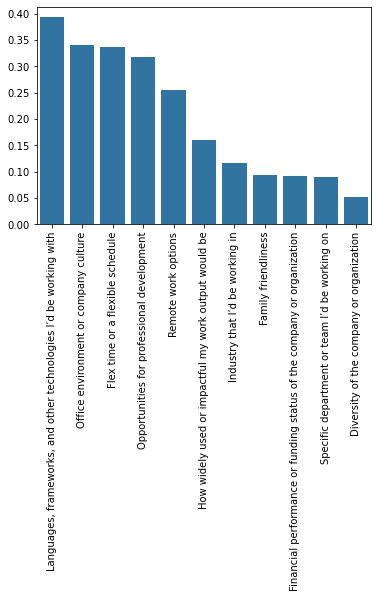

In [9]:
#Plot
base_color = sb.color_palette()[0]
sb.barplot(data=df_items.transpose().drop("count"), color = base_color)
plt.xticks(rotation=90);

In [ ]:
#It seems that it is the technologies worked with and the direct work environment that are most important, 
#while family friendliness and diversity play only a minor role.